In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, PoissonRegressor, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.metrics import f1_score,r2_score, mean_squared_error, mean_squared_log_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_excel("Data.xlsx")

In [3]:
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,Null,11753


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in ['Airline','Source','Destination','Route','Total_Stops','Additional_Info','Price']:
    print(f"The unique values in the column {i} are:",data[i].unique(), sep='\n')

The unique values in the column Airline are:
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The unique values in the column Source are:
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The unique values in the column Destination are:
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
The unique values in the column Route are:
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA →

In [8]:
for i in ['Airline','Source','Destination','Route','Total_Stops','Additional_Info','Price']:
    print(f"The  number of unique values in the column {i} are : {data[i].nunique()}", sep='\n')

The  number of unique values in the column Airline are : 12
The  number of unique values in the column Source are : 5
The  number of unique values in the column Destination are : 6
The  number of unique values in the column Route are : 128
The  number of unique values in the column Total_Stops are : 5
The  number of unique values in the column Additional_Info are : 10
The  number of unique values in the column Price are : 1870


In [9]:
data['Additional_Info'].isnull().sum()

0

In [10]:
factor = len(data[(data['Additional_Info']=='Null')|(data['Additional_Info'] == 'Null ')])/len(data['Additional_Info'])
percentage= round(factor * 100)
print(f'The percentage of nulls in Additional Info is {percentage}%')
if percentage>50:
    print("remove column")
else:
    print("Do data analysis")

The percentage of nulls in Additional Info is 78%
remove column


In [11]:
data.duplicated().sum()

220

In [12]:
def preprocess(data):
    '''docstring'''
    data.dropna(inplace = True)
    data.drop_duplicates(inplace = True)
    
    ## MAKING DATA READY FOR EXPLORATORY DATA ANALYSIS
    # extract info from date of journey
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], dayfirst=True)
    data['Day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['Month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['Year'] = pd.DatetimeIndex(data['Date_of_Journey']).year
    data['Weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    
    #lets change the value in total stops
    data['Total_Stops'] =data['Total_Stops'].replace('non-stop', '0')
    data['Total_Stops'] = data["Total_Stops"].replace('1 stop','1')
    data['Total_Stops'] = data['Total_Stops'].replace('2 stops', '2')
    data['Total_Stops'] = data['Total_Stops'].replace('3 stops', '3')
    data['Total_Stops'] = data['Total_Stops'].replace('4 stops', '4')
    data['Total_Stops'] = data['Total_Stops'].astype(int)
    
    #merging airlines with flight type in airline feature
    data['Airline'] = np.where(data['Airline'] == 'Jet Airways Business','Jet Airways',data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Vistara Premium economy','Vistara',data['Airline'])
    data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy','Multiple carriers',data['Airline'])
    
    #merging new delhi with delhi in destination feature
    data['Destination'] = np.where(data['Destination'] == 'New Delhi', "Delhi", data["Destination"])
    
    #making column data consistent
    arrival_time = []
    for i in data['Arrival_Time']:
        arrival_time.append(i[:5])#string slicing   
    data['Arrival_Time'] = arrival_time
    
    #extracting info from arrival time
    data["Arrival_Time_Hour"] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data["Arrival_Time_Minutes"] = pd.DatetimeIndex(data['Arrival_Time']).minute
    
    #extract info from Dep_Time
    data["Dep_Time_Hour"] = pd.DatetimeIndex(data['Dep_Time']).hour
    data["Dep_Time_Minutes"] = pd.DatetimeIndex(data['Dep_Time']).minute
    
    #making data consistent in right format(i.e hours) in duration column
    data['Duration_Hours'] = data['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)
    
    ## MAKING DATA READY FOR MODELLING
    
    data1 = pd.get_dummies(data,prefix=['Airline','Source','Destination'],columns=['Airline','Source','Destination'], drop_first = True,dtype=int)
    data1.drop(['Additional_Info','Duration','Date_of_Journey','Year',"Route",'Arrival_Time','Dep_Time'],axis=1,inplace = True)
    
    return data, data1

In [13]:
data_eda, data_model = preprocess(data)

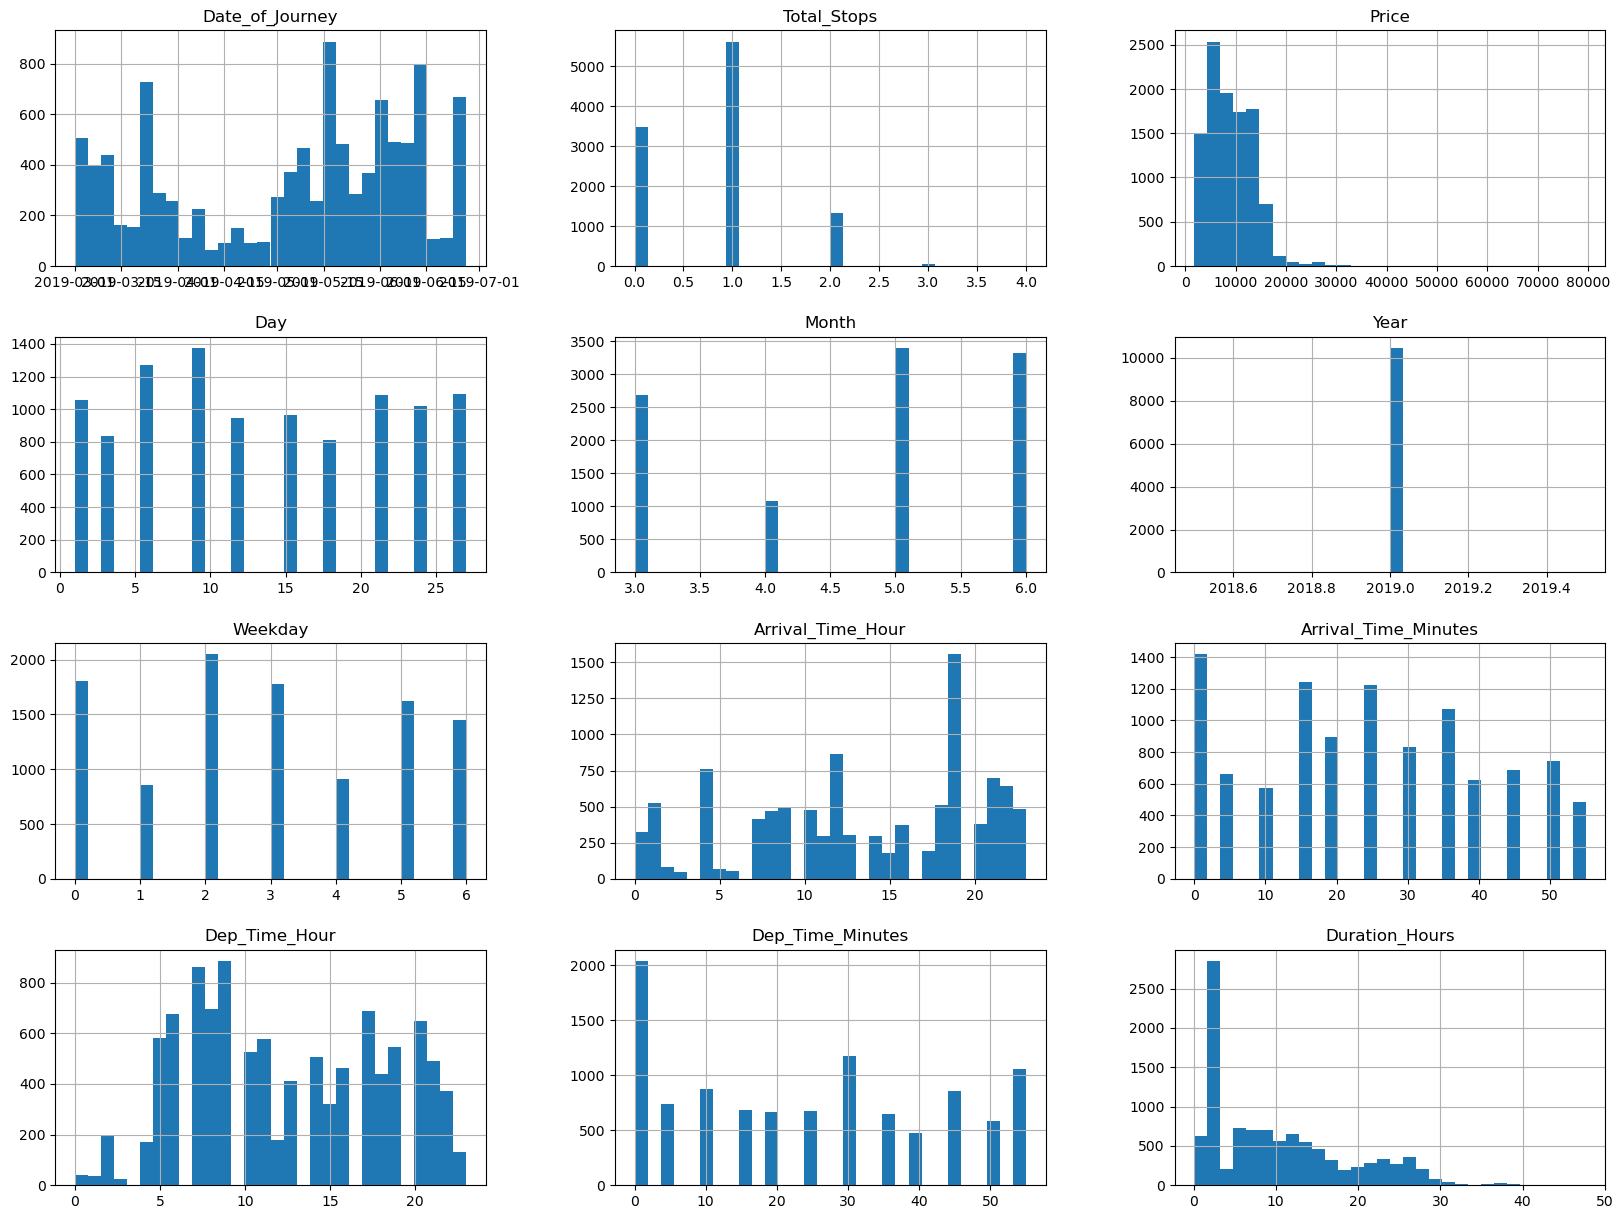

In [14]:
# Plot distributions of all features
data_eda.hist(bins=30, figsize=(20, 15))
plt.show()

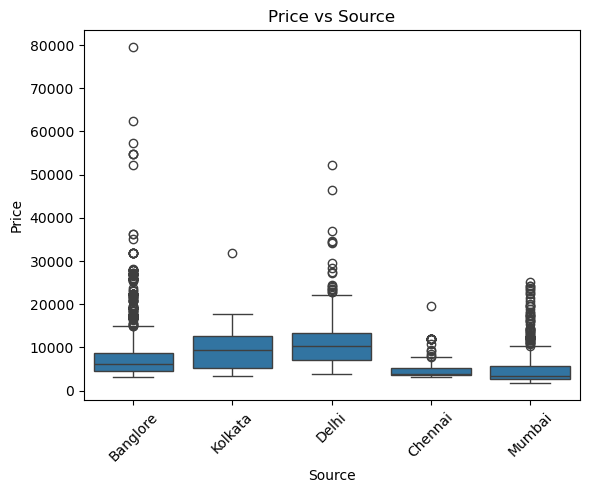

In [15]:
sns.boxplot(x='Source', y='Price', data=data_eda)
plt.title('Price vs Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

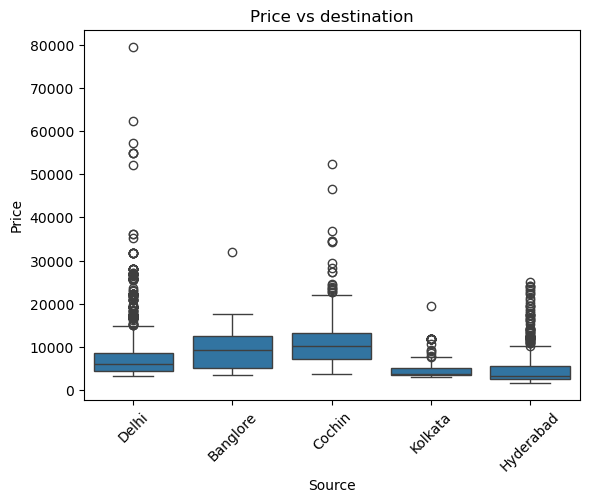

In [16]:
sns.boxplot(x='Destination', y='Price', data=data_eda)
plt.title('Price vs destination')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

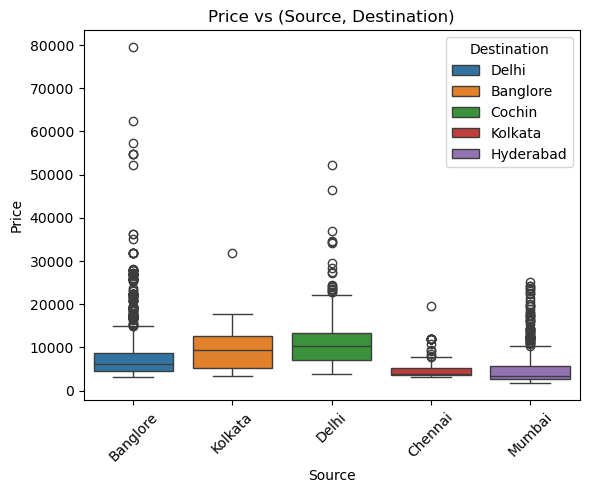

In [17]:
sns.boxplot(x='Source', y='Price', hue='Destination', data=data_eda)
plt.title('Price vs (Source, Destination)')
plt.xlabel('Source')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

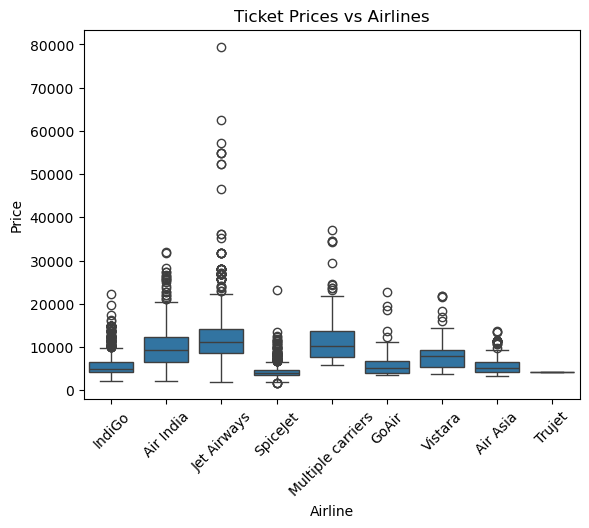

In [18]:
sns.boxplot(x='Airline', y='Price', data=data_eda)
plt.title('Ticket Prices vs Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

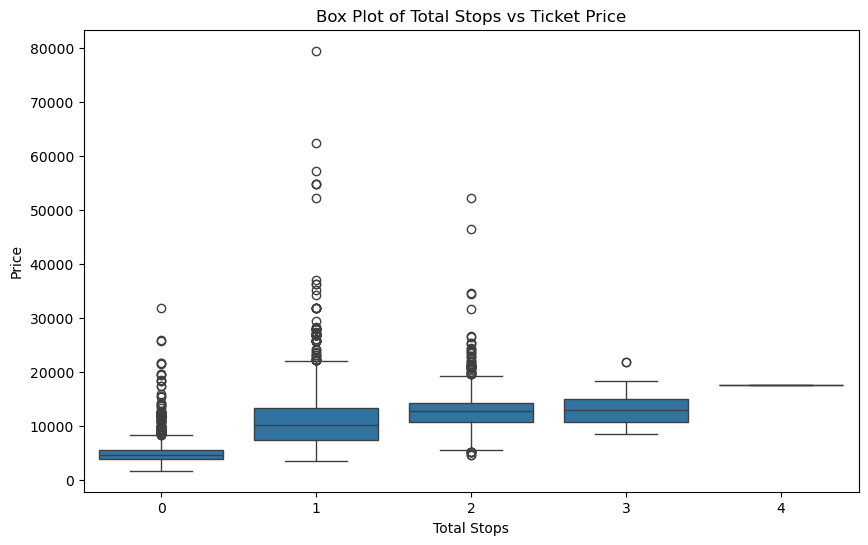

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=data_eda)
plt.title('Box Plot of Total Stops vs Ticket Price')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


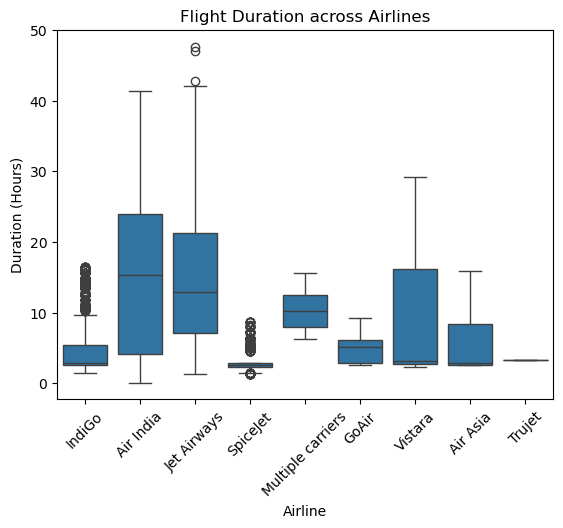

In [20]:
sns.boxplot(x='Airline', y='Duration_Hours', data=data_eda)
plt.title('Flight Duration across Airlines')
plt.xlabel('Airline')
plt.ylabel('Duration (Hours)')
plt.xticks(rotation=45)
plt.show()


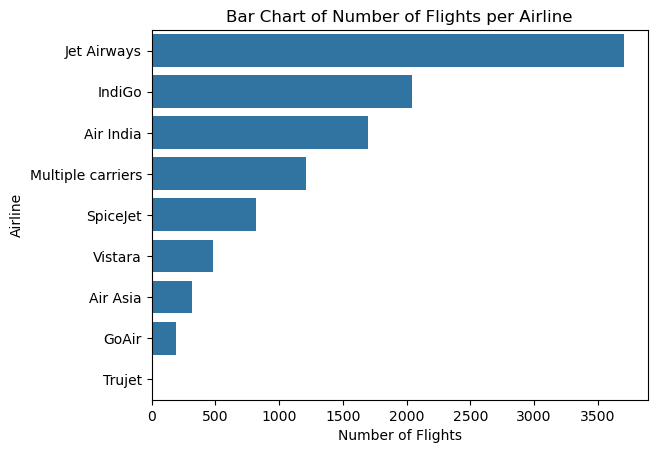

In [21]:
sns.countplot(y='Airline', data=data_eda, order=data_eda['Airline'].value_counts().index)
plt.title('Bar Chart of Number of Flights per Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

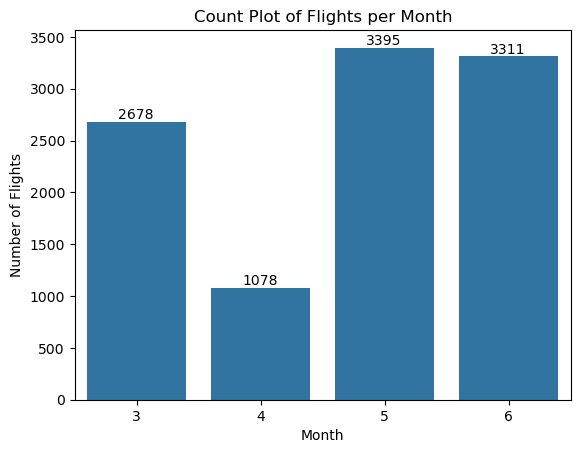

In [22]:
ax = sns.countplot(x='Month', data=data_eda)
plt.title('Count Plot of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

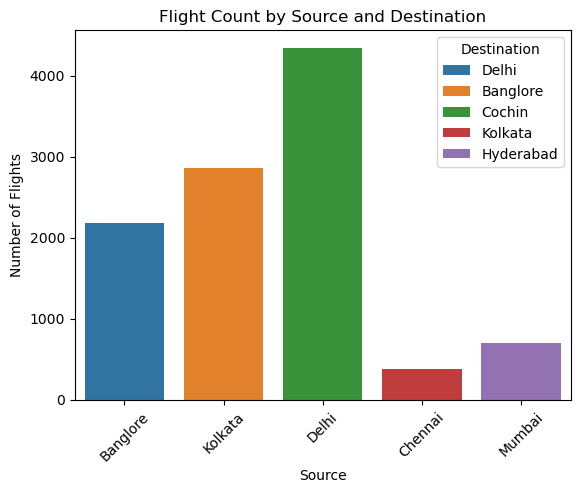

In [23]:
ax =  sns.countplot(x='Source', hue='Destination', data=data_eda)
plt.title('Flight Count by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

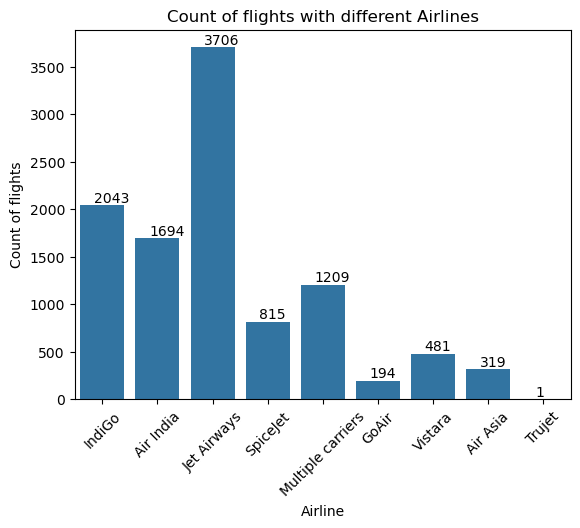

In [24]:
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data_eda)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [25]:
data_model.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Weekday', 'Arrival_Time_Hour',
       'Arrival_Time_Minutes', 'Dep_Time_Hour', 'Dep_Time_Minutes',
       'Duration_Hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [26]:
features = ['Total_Stops', 'Price','Day', 'Month', 'Weekday']

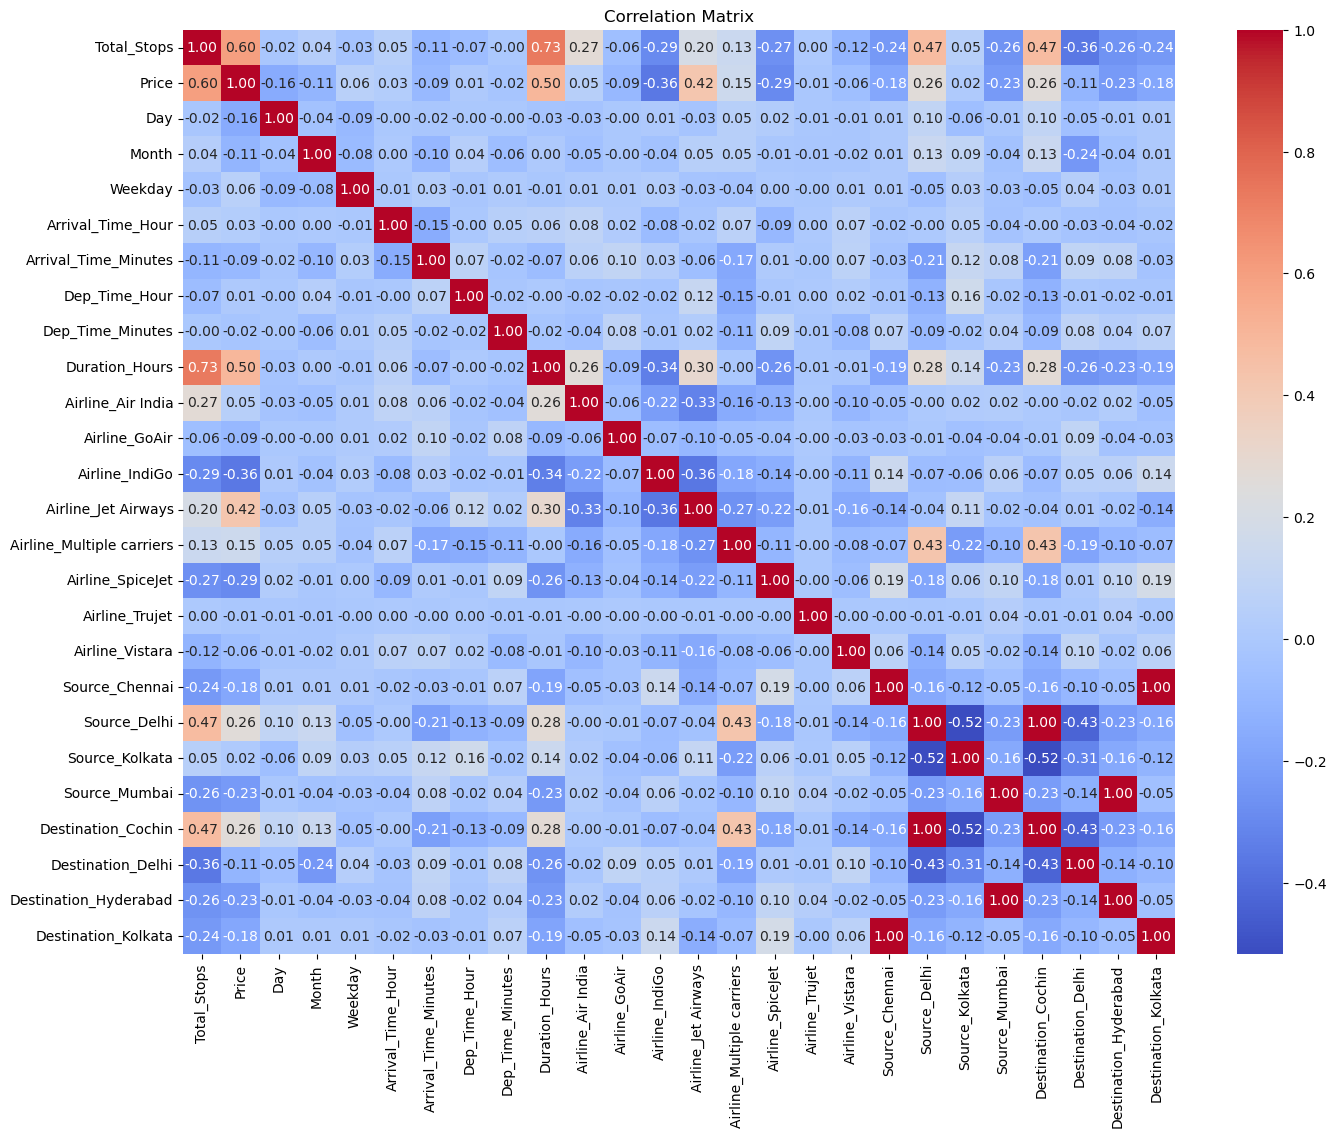

In [27]:
# Correlation Analysis
corr_matrix = data_model.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Handling outliers in the 'Price' column
# We'll remove outliers that are beyond the 1.5 IQR (Interquartile Range) rule

Q1 = data_model['Price'].quantile(0.25)
Q3 = data_model['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_model_filtered = data_model[(data_model['Price'] >= lower_bound) & (data_model['Price'] <= upper_bound)]

# Display the number of rows removed and the updated dataset info
removed_outliers = data_model.shape[0] - data_model_filtered.shape[0]
data_model_filtered.info(), removed_outliers


<class 'pandas.core.frame.DataFrame'>
Index: 10368 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total_Stops                10368 non-null  int32  
 1   Price                      10368 non-null  int64  
 2   Day                        10368 non-null  int32  
 3   Month                      10368 non-null  int32  
 4   Weekday                    10368 non-null  int32  
 5   Arrival_Time_Hour          10368 non-null  int32  
 6   Arrival_Time_Minutes       10368 non-null  int32  
 7   Dep_Time_Hour              10368 non-null  int32  
 8   Dep_Time_Minutes           10368 non-null  int32  
 9   Duration_Hours             10368 non-null  float64
 10  Airline_Air India          10368 non-null  int32  
 11  Airline_GoAir              10368 non-null  int32  
 12  Airline_IndiGo             10368 non-null  int32  
 13  Airline_Jet Airways        10368 non-null  int32  


(None, 94)

In [29]:
# Drop target from features
target = 'Price'
features = data_model_filtered.drop(columns=[target])

X = features
y = data_model_filtered[target]

In [30]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# Hyperparameter tuning for Random Forest and Gradient Boosting
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [33]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_


In [34]:
# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='r2')
grid_search_gb.fit(X_train, y_train)
best_gb = grid_search_gb.best_estimator_

In [35]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [36]:
# Improving Linear Regression with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train_poly)
y_train_pred = lin_reg.predict(X_train_poly)

In [37]:
gradient_reg = GradientBoostingRegressor()
gradient_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
# Evaluate models
models = {
    'Linear Regression': lin_reg,
    'GradientBoostingRegressor':gradient_reg,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb
}



results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
    elif name in ['Lasso Regression','Ridge Regression','LogisticRegression','PassiveAggressiveRegressor','PoissonRegressor'] :
         y_train_pred = model.predict(X_train)
         y_test_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mase = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mase = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'train_mse': train_mse,
        'train_mase': train_mase,
        'train_r2': train_r2,
        'test_mse': test_mse,
        'test_mase': test_mase,
        'test_r2': test_r2
    }

    print(f"{name}:")
    print(f"  Training  Root Mean Squared Error: {sqrt(train_mse)}")
    print(f"  Training Mean Absolute % Error: {train_mase}")
    print(f"  Training R^2 Score: {train_r2}")
    print(f"  Testing  Root Mean Squared Error: {sqrt(test_mse)}")
    print(f"  Testing Mean Absolute % Error: {test_mase}")
    print(f"  Testing R^2 Score: {test_r2}")
    print("-" * 30)

Linear Regression:
  Training  Root Mean Squared Error: 2072.1951510975077
  Training Mean Absolute % Error: 0.19328975608655083
  Training R^2 Score: 0.7418432940007491
  Testing  Root Mean Squared Error: 2100.452353113632
  Testing Mean Absolute % Error: 0.20266065758505653
  Testing R^2 Score: 0.728206294747834
------------------------------
GradientBoostingRegressor:
  Training  Root Mean Squared Error: 1874.128724660925
  Training Mean Absolute % Error: 0.1700693613360865
  Training R^2 Score: 0.7888354851494837
  Testing  Root Mean Squared Error: 1941.6600779194678
  Testing Mean Absolute % Error: 0.1780119593912037
  Testing R^2 Score: 0.767747644141767
------------------------------
Random Forest:
  Training  Root Mean Squared Error: 1141.49348078405
  Training Mean Absolute % Error: 0.0861645487587237
  Training R^2 Score: 0.9216626320282504
  Testing  Root Mean Squared Error: 1613.6331656062923
  Testing Mean Absolute % Error: 0.12233251539963187
  Testing R^2 Score: 0.839592